<a href="https://colab.research.google.com/github/WhiteHum/Medical-AI-Deep-Learning-Drug-Toxicitiy-Prediction-/blob/main/Deep_learning_Regression_code_Pattern_(Drug_Toxicity_Prediction).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Fri Dec  2 00:10:46 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   67C    P0    27W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## **라이브러리 설치하기**

In [2]:
# 필요한 라이브러리 설치하기

!pip install PyTDC
!pip install lifelines #생존 분석에 쓰이는 것
!pip install rdkit-pypi #화학 분석에 쓰이는 것

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100 kB 5.8 MB/s 
     |████████████████████████████████| 29.3 MB 1.4 MB/s 
  Created wheel for PyTDC: filename=PyTDC-0.3.8-py3-none-any.whl size=136139 sha256=aeabaa8c294f6deb32e80b5fd66953cfe27e29cf0467313f40baff125704f22b
  Stored in directory: /root/.cache/pip/wheels/4a/4f/da/b494dde823e311675b3ce778ca8c22e734ef8f779dbf311805
Successfully built PyTDC
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 349 kB 6.2 MB/s 
     |████████████████████████████████| 77 kB 7.2 MB/s 
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4048 sha256=7c955d130184ba465aee949156a4d5602d63a0af1297e15c3979268ca6377fb7
  Stored in directory: /root/.cache/pip/wheels/16/a2/b6/582cfdfbeeccd469504a01af3bb952fd9e7eccba40995eafea
Successfully built au

## **데이터 준비**

In [4]:
from tdc.single_pred import Tox

# TDC api를 이용하여 LD50 데이터 불러오기
data = Tox(name = 'LD50_Zhu')
# 불러온 데이터 train-valid-test로 나누기
split = data.get_split()

Downloading...
100%|██████████| 707k/707k [00:00<00:00, 2.82MiB/s]
Loading...
Done!


In [5]:
# 나누어진 데이터 확인
split.keys()

dict_keys(['train', 'valid', 'test'])

In [6]:
# Train data
split['train']

,Drug_ID,Drug,Y
0,"Methane, tribromo-",BrC(Br)Br,2.343
1,Bromoethene (9CI),C=CBr,2.330
2,"1,1'-Biphenyl, hexabromo-",Brc1ccc(-c2ccc(Br)c(Br)c2Br)c(Br)c1Br,1.465
3,"Isothiocyanic acid, p-bromophenyl ester",S=C=Nc1ccc(Br)cc1,2.729
4,"Benzene, bromo-",Brc1ccccc1,1.765
...,...,...,...
5165,"Benzenesulfonic acid, 3,5-dimethyl-4-hydroxy-",Cc1cc(S(=O)(=O)O)cc(C)c1O,1.883
5166,"Isocyanic acid, (alpha,alpha,alpha-trifluoro-o...",O=C=Nc1ccccc1C(F)(F)F,1.427
5167,"Propanenitrile, 3-((2-(acetyloxy)ethyl)phenyla...",CC(=O)OCCN(CCC#N)c1ccccc1,2.050
5168,"IH-Indene-1,3(2H)-dione, 2-(2-methyl-1-(2-(1-p...",CC1=CC(=C2C(=O)c3ccccc3C2=O)C=CN1CCN1CCCCC1,2.951


# validation set을 사용하는 이유 : 바로 "모델의 성능을 평가하기 위해서" 입니다. 

training을 한 후에 만들어진 모형이 잘 예측을 하는지 그 성능을 평가하기 위해서 사용합니다.

validation test set과의 차이점은 test set은 모델의 '최종 성능' 을 평가하기 위해서 쓰이며, training의 과정에 관여하지 않는 차이가 있습니다. 반면 validation set은 여러 모델 중에서 최종 모델을 선정하기 위한 성능 평가에 관여한다 보시면됩니다. 따라서 validation set은 training과정에 관여하게 됩니다. 즉, validation set은 training 과정에 관여를 하며, training이 된 여러가지 모델 중 가장 좋은 하나의 모델을 고르기 위한 셋입니다.

In [8]:
# Valid data
split['valid']

,Drug_ID,Drug,Y
0,"Heptanoic acid, 7-iodo-",O=C(O)CCCCCCI,2.058
1,"2(1H)-Quinazolinone, 4-(3-hydroxyphenyl)-7-met...",Cc1ccc2c(-c3cccc(O)c3)nc(=O)n(C(C)C)c2c1,2.266
2,"Heptanoic acid, 2-(4-(3-(2-(trifluoromethyl)-1...",CCCCCCC(=O)OCCN1CCN(CCCN2c3ccccc3Sc3ccc(C(F)(F...,3.378
3,"1-Butanol, 2-ethyl-",CCC(CC)CO,1.742
4,"2,8,9-Trioxa-5-aza-1-silabicyclo(3.3.3)undecan...",Clc1cccc([Si]23OCCN(CCO2)CCO3)c1,4.255
...,...,...,...
733,"(1)-alpha,alpha,4-Trimethylcyclohex-3-ene-1-me...",CC1=CCC(C(C)(C)O)CC1,1.475
734,5-(Aminomethyl)isoxazol-3-ol hydrate,NCc1cc(=O)[nH]o1,3.404
735,"Acetaldehyde, diethyl acetal",CCOC(C)OCC,1.410
736,"3H-1,4-Benzodiazepin-2-amine, 7-chloro-N-(cycl...",[O-][N+]1=C(c2ccccc2)c2cc(Cl)ccc2N=C(NCC2CC2)C1,1.888


In [9]:
# Test data
split['test']

,Drug_ID,Drug,Y
0,"Ether, alpha-(bromomethyl)-p-cyclopentylbenzyl...",CCCCOC(CBr)c1ccc(C2CCCC2)cc1,3.114
1,"Benzene, 1,4-dinitroso-",O=Nc1ccc(N=O)cc1,2.125
2,"Succinic acid, mercapto-, diethyl ester, S-est...",CCOC(=O)CC(SP(=O)(OC)SC)C(=O)OCC,3.466
3,"Phosphorodithioic acid, O,S,S-triethyl ester",CCOP(=O)(SCC)SCC,3.185
4,"Phenol, 2-octyl- (9CI)",CCCCCCCCc1ccccc1O,1.867
...,...,...,...
1472,"1H-1,2,4-Triazole, 1-((2-(2,4-dichlorophenyl)-...",CCCC1COC(Cn2cncn2)(c2ccc(Cl)cc2Cl)O1,2.353
1473,"Phosphorothioic acid, O-(3-chloro-4-nitropheny...",CCOP(=S)(OCC)Oc1ccc([N+](=O)[O-])c(Cl)c1,3.814
1474,"Dibenz(b,f)oxepin-2-acetic acid, 10,11-dihydro...",Cc1ccc2c(c1)CC(=O)c1cc(CC(=O)O)ccc1O2,2.937
1475,"Phosphorothioic acid, O,O-dimethyl S-(2-(ethyl...",CCS(=O)(=O)CCSP(=O)(OC)OC,3.908


## **데이터 전처리 (Data pre-processing)**

In [10]:
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem
import numpy as np

In [11]:
def smiles2morgan(s, radius = 2, nBits = 1024):
  """ SMILES data를 morgan fingerprint 데이터로 변환
      Args : 
            s (str) : SMILES of a drug
            radius (int) : ECFP radius
            bBits (int) : size of binary representation
      Return (): morgan fingerprint
  
  """
  try:
    mol = Chem.MolFromSmiles(s)
    features_ves = AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits = nBits)
    features = np.zeros((1,))
    DataStructs.ConvertToNumpyArray(features_ves, features)

  except:
    print('rdkit not found this smiles for morgan: ' + s + 'convert to all 0 features')
    features = np.zeros((nBits, ))

  return features

In [12]:
# 전처리 함수 적용하기

for mode in ['train', 'valid', 'test']:
  split[mode]['embedding'] = split[mode]['Drug'].apply(smiles2morgan)

In [13]:
# morgan fingerprint로 전환된 데이터 확인
split['test']['embedding']

0       [0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...
1       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
2       [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
3       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
                              ...                        
1472    [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1473    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1474    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1475    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1476    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Name: embedding, Length: 1477, dtype: object

## **Torch dataset + DataLoader 만들기**

In [14]:
import torch
from torch import nn
import torch.nn.functional as F
from torch.utils import data

In [15]:
# 전처리한 데이터를 학습에 사용하기 위한 추상 클래스
# torch.utils.data.Dataset을 상속

class data_progress_loader(data.Dataset):
  
  # 생성자, 앞서 전처리한 데이터를 attribute에 저장
  def __init__(self, df):
    self.df = df
  
  # 전체 샘플 개수 출력을 위한 method
  def __len__(self):
    return self.df.shape[0]

  # 인덱스로 데이터에 접근하기 위한 method
  def __getitem__(self, index):
    v_d = self.df.iloc[index]['embedding'] #input
    y = self.df.iloc[index]['Y'] # label
    return v_d, y

In [16]:
train_dataset = data_progress_loader(split['train'])
valid_dataset = data_progress_loader(split['valid'])
test_dataset = data_progress_loader(split['test'])

In [17]:
# DataLoader을 위한 hyperparameter 설정

params = {'batch_size': 64,
          'shuffle': True,
          'num_workers': 1,
          'drop_last': False}

In [18]:
training_generator = data.DataLoader(train_dataset, **params)
valid_generator = data.DataLoader(valid_dataset, **params)
test_generator = data.DataLoader(test_dataset, **params)

In [19]:
# DataLoader로 쌓인 데이터 확인해 보기

for v_d, y in training_generator:
  print(v_d)
  print(v_d.shape)
  print()
  print(y)
  print(y.shape)
  break

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], dtype=torch.float64)
torch.Size([64, 1024])

tensor([2.5540, 1.6490, 2.1830, 3.0900, 2.0540, 2.2720, 2.9320, 1.5220, 2.0820,
        1.7230, 2.2000, 2.7550, 2.2560, 3.3330, 3.0370, 2.4950, 2.6560, 3.2900,
        2.7750, 1.6910, 2.3220, 3.0200, 2.9600, 3.8000, 2.9090, 2.8670, 2.8520,
        0.8510, 2.5940, 1.8590, 1.4380, 2.2330, 2.9570, 2.1080, 3.5430, 5.2360,
        3.9750, 1.0220, 2.1270, 3.1300, 2.6800, 1.8440, 2.4460, 2.4570, 1.2650,
        2.3570, 1.4030, 2.1090, 2.7130, 3.9210, 2.7010, 2.1110, 1.4700, 2.6200,
        3.4510, 2.8770, 3.2230, 3.6780, 1.7060, 2.2190, 2.9550, 3.5130, 3.1680,
        2.5090], dtype=torch.float64)
torch.Size([64])


In [20]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'현재 devices는 {device} 입니다.')

현재 devices는 cuda 입니다.


## **모델 만들기**

### **Feature extractor**

In [56]:
class MLP(nn.Sequential):

  # input_dim (int) : 입력층 차원
  # output_dim (int) : 출력층 차원
  # hidden_dums_lst (list) : hidden 차원의 차원
  def __init__(self, input_dim, output_dim, hidden_dims_lst):
    super(MLP, self).__init__()

    # Feature extractor layer size
    layer_size = len(hidden_dims_lst) + 1

    # 각 층의 차원 크기를 담은 리스트
    dims = [input_dim] + hidden_dims_lst + [output_dim]

    # 입력층, hidden 층, 출력층 차원대로 linear layer 쌓기
    self.predictor = nn.ModuleList([nn.Linear(dims[i], dims[i+1]) for i in range(layer_size)])
  
  def forward(self, v) :
    # 입력 데이터로 forward pass
    v = v.float().to(device)
    for i, I in enumerate(self.predictor):
      v = F.relu(I(v))
    return v



In [57]:
class Classifier(nn.Sequential):
  
  # model_drug : 앞서 생성한 Feature extractor
  # hidden_dim_drug (int) : Classifier 입력층을 차원
  # cls_hidden_dims (list) : Classifier hidden 차원
  def __init__(self, model_drug, hidden_dim_drug, cls_hidden_dims):
    super(Classifier, self).__init__()

    # feature extractor
    self.model_drug = model_drug

    # dropout
    self.dropout = nn.Dropout(0.1)

    # classifier 입력 차원
    self.input_dim_drug = hidden_dim_drug

    # classifier hidden 차원
    self.hidden_dims = cls_hidden_dims

    # classifier layer size 
    layer_size = len(self.hidden_dims) +1 

    # 각 층의 차원 크기를 담은 리스트
    dims = [self.input_dim_drug] + self.hidden_dims +[1]

    # 입력층, hidden 층, 출력층 차원대로 linear layer 쌓기
    self.predictor = nn.ModuleList([nn.Linear(dims[i], dims[i+1]) for i in range(layer_size)])

  def forward(self, v_D):

    # feature extractor로 입력 데이터 encoding
    v_f = self.model_drug(v_D)

    # forword-pass with classify
    for i, I in enumerate(self.predictor):
      if i ==(len(self.predictor)-1):
        v_f = I(v_f)
      else:
        v_f  = F.relu(self.dropout(I(v_f)))
    return v_f



In [58]:
# 모델 hyperparameter

input_dim_drug = 1024
hidden_dim_drug = 256
cls_hidden_dims = [1024, 1024, 512]
mip_hidden_dims_drug = [1024, 256, 64]

In [59]:
# 모델 선언하기
model_drug = MLP(1024, hidden_dim_drug, mip_hidden_dims_drug)
model_drug

MLP(
  (predictor): ModuleList(
    (0): Linear(in_features=1024, out_features=1024, bias=True)
    (1): Linear(in_features=1024, out_features=256, bias=True)
    (2): Linear(in_features=256, out_features=64, bias=True)
    (3): Linear(in_features=64, out_features=256, bias=True)
  )
)

In [60]:
model = Classifier(model_drug, hidden_dim_drug, cls_hidden_dims)
model

Classifier(
  (model_drug): MLP(
    (predictor): ModuleList(
      (0): Linear(in_features=1024, out_features=1024, bias=True)
      (1): Linear(in_features=1024, out_features=256, bias=True)
      (2): Linear(in_features=256, out_features=64, bias=True)
      (3): Linear(in_features=64, out_features=256, bias=True)
    )
  )
  (dropout): Dropout(p=0.1, inplace=False)
  (predictor): ModuleList(
    (0): Linear(in_features=256, out_features=1024, bias=True)
    (1): Linear(in_features=1024, out_features=1024, bias=True)
    (2): Linear(in_features=1024, out_features=512, bias=True)
    (3): Linear(in_features=512, out_features=1, bias=True)
  )
)

## **모델 학습 진행 (model training)**

In [61]:
# 학습에 필요한 hyperparameter

learning_rate = 0.0001
decay = 0.00001
train_epoch = 15

In [62]:
# optimizer
opt = torch.optim.Adam(model.parameters(), lr = learning_rate, weight_decay = decay)
loss_fn = torch.nn.MSELoss()

In [44]:
# 라이브러리 호출

import copy
from prettytable import PrettyTable
from time import time
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
from lifelines.utils import concordance_index

* MSE : 손실함수. 정답에 대한 오류를 숫자로 나타내는 것으로 오답에 가까울수록 큰 값이 나온다. 반대로 정답에 가까울수록 작은 값이 나온다.

* Pearson correlation coefficient(r2) : 피어슨 상관 계수. X와 Y의 선형 상관 관계를 계량화 한 함수. 결과값은 -1 ~ 1 사이의 값이며,양의 상관 관계가 있을수록 1에 가깝고, 음의 상관 관계가 있을수록 -1에 가깝습니다. 또한, 상관 관계가 없을수록 0에 가깝습니다.

* 피어슨 상관 계수의 p-value : p-value가 0.05이상인 경우에는 함께 보여지는 상관계수가 큰 의미가 없습니다. 귀무가설 자체가 "상관 계수는 0이다."이기 때문에 p-value가 0.05미만일 때에만 상관계수가 의미를 가집니다.

* 생존분석 (CI) : c-index는 '샘플들을 생존시간의 오름차순으로 나열하고, 사건이 관찰된 각 샘플들보다 오래 생존한 샘플들의 개수를 모두 더한 총합'과 '샘플들을 예측된 생존시간의 오름차순으로 나열하고, 사건이 관찰된 각 샘플들보다 오래 생존할 것으로 올바르게 예측된 샘플들의 개수를 모두 더한 총합'의 비율(fraction)로 계산된다.

In [64]:
loss_history = []

max_MSE = 10000

# 모델 GPU에 메모리 올리기
model = model.to(device)

# Best 모델 초기화
model_max = copy.deepcopy(model)

# 결과 정리를 위한 PrettyTable
valid_metric_record = []
valid_metric_header = ['#epoch']
valid_metric_header.extend(['MSE', 'Person Correlation', 'with p-value', 'Concordance Index'])
table = PrettyTable(valid_metric_header)

# float 소수점 4자리까지만 str로 바꾸기
float2str = lambda x : '%0.4f000f' %x

# 학습 진행
print ('--- Go for Training ---')

# 학습 시간 시간 기록
t_start = time()

for epo in range(train_epoch):

  # Model training
  model.train()

  # Mini-batch 학습
  for i, (v_d, label) in enumerate(training_generator):

    # input data gpu에 올리기
    v_d = v_d.float().to(device)
    score = model(v_d) # forward-pass

    n = torch.squeeze(score, 1)

    # 미리 정의한 손실함수(MSE)로 손실(loss) 계산
    loss = loss_fn(n.float(), label.float().to(device))

    # 각 iteration 마다 loss 기록
    loss_history.append(loss.item())

    # grdient 초기화
    opt.zero_grad()
    # back propagation
    loss.backward()
    # parameter update
    opt.step()

  # gradient tracking X
  with torch.set_grad_enabled(False):

    y_pred = []
    y_label = []
    
    # model validation
    model.eval()

    for i, (v_d, label) in enumerate(valid_generator):

      # validation 입력 데이터 gpu에 올리기
      v_d = v_d.float().to(device)
      score = model(v_d) # forward-pass

      # 예측값, 참값 cpu로 옮기고 numpy 형으로 변환
      logits = torch.squeeze(score).cpu().numpy()
      label_ids = label.cpu().numpy()

      # 예츨값, 참값 기록하기
      y_label = y_label + label_ids.flatten().tolist()
      y_pred = y_pred + logits.flatten().tolist()

  # metric 계산
  mse = mean_squared_error(y_label, y_pred) # MSE
  r2 = pearsonr(y_label, y_pred)[0] # Pearson correlation coefficient
  p_val = pearsonr(y_label, y_pred)[1] # Pearson correlation p-value
  CI = concordance_index(y_label, y_pred) # CI

  # 계산한 metric 합치기
  lst = ['epoch' + str(epo)] + list(map(float2str, [mse, r2, p_val, CI]))

  # 각 epoch 마다 결과값 pretty table에 기록
  table.add_row(lst)
  valid_metric_record.append(lst)

  # mse 기준으로 best model 업데이트
  if mse < max_MSE:
    # best model deepcopy
    model_max = copy.deepcopy(model)
    # max MSE 업데이트
    max_MSE = mse
  
  # 각 epoch 마다 결과 출력
  print('Validation at Epoch' + str(epo +1) + ' , MSE ' + str(mse)[:7] + ' ,  Pearson Correlation ' + str(r2)[:7] + 
        ' with p-value: ' + str(f"{p_val : .2E}") + ' , Concordance Index : ' + str(CI)[:7])

--- Go for Training ---
Validation at Epoch1 , MSE 0.57095 ,  Pearson Correlation 0.65095 with p-value:  3.65E-90 , Concordance Index : 0.71920
Validation at Epoch2 , MSE 0.50265 ,  Pearson Correlation 0.70319 with p-value:  3.96E-111 , Concordance Index : 0.74055
Validation at Epoch3 , MSE 0.44509 ,  Pearson Correlation 0.73294 with p-value:  2.91E-125 , Concordance Index : 0.75758
Validation at Epoch4 , MSE 0.42998 ,  Pearson Correlation 0.75278 with p-value:  8.59E-136 , Concordance Index : 0.76628
Validation at Epoch5 , MSE 0.45245 ,  Pearson Correlation 0.75535 with p-value:  3.14E-137 , Concordance Index : 0.76791
Validation at Epoch6 , MSE 0.41456 ,  Pearson Correlation 0.75767 with p-value:  1.52E-138 , Concordance Index : 0.77281
Validation at Epoch7 , MSE 0.41951 ,  Pearson Correlation 0.75714 with p-value:  3.05E-138 , Concordance Index : 0.77274
Validation at Epoch8 , MSE 0.41313 ,  Pearson Correlation 0.76207 with p-value:  4.49E-141 , Concordance Index : 0.77459
Validatio

## **모델 테스트 진행 (model testing)**

In [66]:
# Test 진행할 데이터 확인
for i, (v_d, label) in enumerate(test_dataset):
  print(v_d)
  print(label)
  break

[0. 1. 0. ... 0. 0. 0.]
3.114


In [67]:
# 테스트 진행

y_pred = []
y_label = []

model.eval()
for i, (v_d, label) in enumerate(test_generator):
  
  # input data gpu에 올리기
  v_d = v_d.float().to(device)
  
  # forward-pass
  score = model(v_d)

  # 예측값 gradient graph detach -> cpu로 옮기기 -> numpy 형으로 변환
  logits = torch.squeeze(score).detach().cpu().numpy()

  # 참값 cpu로 옮기고 numpy 형으로 변환
  label_ids = label.cpu().numpy()

  # 예측값, 참값 기록
  y_label = y_label + label_ids.flatten().tolist()
  y_pred = y_pred + logits.flatten().tolist()

# metric 계산
mse = mean_squared_error(y_label, y_pred) # MSE
r2 = pearsonr(y_label, y_pred)[0] # Pearson correlation coefficient
p_val = pearsonr(y_label, y_pred)[1] # Pearson correlation p-value
CI = concordance_index(y_label, y_pred) # CI

 # 출력
print('TestSet Performence Metric' + ' , MSE ' + str(mse)[:7] + ' ,  Pearson Correlation ' + str(r2)[:7] + 
        ' with p-value: ' + str(f"{p_val : .2E}") + ' , Concordance Index : ' + str(CI)[:7])


TestSet Performence Metric , MSE 0.39268 ,  Pearson Correlation 0.75352 with p-value:  5.72E-271 , Concordance Index : 0.75694


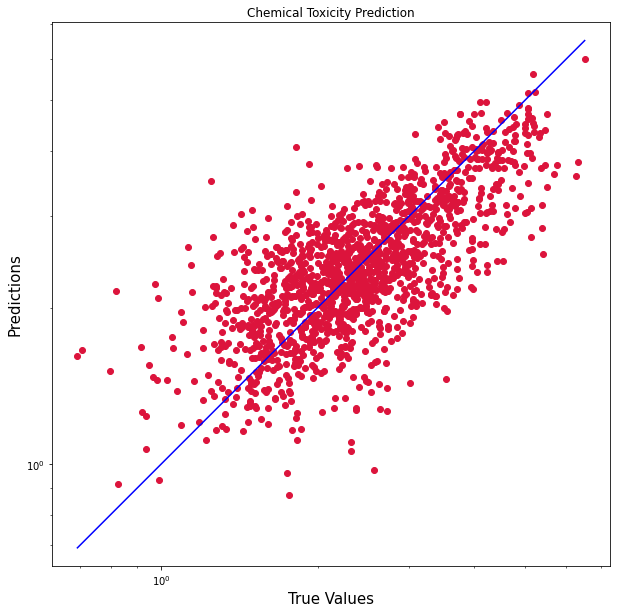

In [69]:
# 최종 테스트 결과 시각화
import matplotlib.pyplot as plt

# 참값 ~ 예측값 scatter plot

plt.figure(figsize = (10, 10))
plt.scatter(y_label, y_pred, c='crimson')
plt.xscale('log')
plt.yscale('log')

p1 = max(max(y_pred), max(y_label))
p2 = min(min(y_pred), min(y_label))

plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.title('Chemical Toxicity Prediction')
plt.show()